In [1]:
# Blok 1 - nacitanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from random import randint


In [2]:
# Blok 2 -Funkcie pre generovanie sumu. Funkcie pre vykreslenie svetelnych kriviek.

def generate_observation_sigma(space_obs_frac=0.5):
    """
    Draws a standard deviation of noise in light curve points from a "true" value provided in synthetic light curve.
    Noise sigma is drawn from bimodal distribution taking into account contributions from space based and earth based
    observations which have different levels of stochastic noise.

    :param space_obs_frac: ratio between earth based and space based observations
    :return: float; standard deviation of the light curve noise
    """
    earth_based_sigma = 4e-3
    space_based_sigma = 2e-4
    sigma = np.random.choice([earth_based_sigma, space_based_sigma], p=[1-space_obs_frac, space_obs_frac])
    return np.random.rayleigh(sigma)

def stochastic_noise_generator(curve):
    """
    Introduces gaussian noise into synthetic observation provided in `curve`.

    :param curve: numpy.array; normalized light curve
    :return: Tuple(numpy.array, float); normalized light curve with added noise, standard deviation of observations
    """
    sigma = generate_observation_sigma()
    return np.random.normal(curve, sigma), np.full(curve.shape, sigma)

def synthetic_curves_plot(n, data, data_noise):
    plt.plot(data[n], color="yellow", linewidth=10)
    plt.plot(data_noise[n*3], color="red", linewidth=0.5)
    plt.plot(data_noise[n*3+1], color="blue", linewidth=0.5)
    plt.plot(data_noise[n*3+2], color="green", linewidth=0.5)
    plt.title("The original curve and its noise curves")
    plt.show()

def observed_curves_plot(name, obs):
    name_c=obs[obs["name"]==name]["name"].count()
    curves=obs[obs["name"]==name][["filter", "curve"]].reset_index()
    for i in range(name_c):
        plt.plot(literal_eval(curves.curve[i]), label=curves["filter"][i])
    plt.legend(title="filter")
    plt.title(name)
    plt.show()

## Analyza syntetickych oddelenych kriviek

In [3]:
# Blok 3 - nacitanie dat
data_det = pd.read_pickle("detached_all_parameters.pkl").reset_index()

In [4]:
# Blok 4 - vypis rozmerov dat a atributov
print("Number of records: ", data_det.shape[0])
print("Number of attributes: ", data_det.shape[1])
print("Attributes: ", list(data_det.columns))

Number of records:  1300000
Number of attributes:  16
Attributes:  ['index', 'id', 'curve', 'primary__t_eff', 'secondary__t_eff', 'inclination', 'mass_ratio', 'primary__surface_potential', 'secondary__surface_potential', 't1_t2', 'filter', 'critical_surface_potential', 'primary__equivalent_radius', 'secondary__equivalent_radius', 'primary__filling_factor', 'secondary__filling_factor']


In [5]:
# Blok 5 - vypis unikatnych filtrov a distribucie dat
print("Unique filters:", data_det["filter"].unique())
print("Distribution of records in each type of filter: \n", data_det["filter"].value_counts())

Unique filters: ['Bessell_U' 'Bessell_B' 'Bessell_V' 'Bessell_R' 'Bessell_I' 'SLOAN_u'
 'SLOAN_g' 'SLOAN_r' 'SLOAN_i' 'SLOAN_z' 'Kepler' 'GaiaDR2' 'TESS']
Distribution of records in each type of filter: 
 Bessell_R    100000
SLOAN_i      100000
Bessell_U    100000
TESS         100000
Bessell_B    100000
Kepler       100000
Bessell_V    100000
GaiaDR2      100000
SLOAN_z      100000
SLOAN_r      100000
Bessell_I    100000
SLOAN_u      100000
SLOAN_g      100000
Name: filter, dtype: int64


In [6]:
# Blok 6 - vypis zakladnych charakteristik
data_det_copy = data_det.copy()
data_det_copy = data_det_copy.drop(columns=['index', 'id', 'curve', 'filter'])
print("Description of numeric attributes: \n ", data_det_copy.describe())

Description of numeric attributes: 
         primary__t_eff  secondary__t_eff   inclination    mass_ratio  \
count    1.300000e+06      1.300000e+06  1.300000e+06  1.300000e+06   
mean     2.243716e+04      1.013212e+04  1.375220e+00  1.752090e+00   
std      1.165838e+04      6.355424e+03  1.632513e-01  2.142423e+00   
min      4.000000e+03      4.000000e+03  7.377260e-01  1.000000e-01   
25%      1.200000e+04      6.000000e+03  1.267385e+00  6.000000e-01   
50%      2.000000e+04      8.000000e+03  1.413717e+00  1.000000e+00   
75%      3.000000e+04      1.200000e+04  1.509858e+00  2.000000e+00   
max      4.500000e+04      4.500000e+04  1.570796e+00  1.000000e+01   

       primary__surface_potential  secondary__surface_potential         t1_t2  \
count                1.300000e+06                  1.300000e+06  1.300000e+06   
mean                 1.803112e+01                  1.672032e+01  2.652065e+00   
std                  2.757523e+01                  4.359045e+01  1.801657e+00  

In [7]:
# Blok 7 - korelacna matica
corr_df = data_det_copy[["inclination", "mass_ratio", "primary__surface_potential", "secondary__surface_potential", "t1_t2", 'primary__equivalent_radius', 'secondary__equivalent_radius']].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,inclination,mass_ratio,primary__surface_potential,secondary__surface_potential,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
inclination,1.000000,-0.017152,0.259710,0.183215,0.003829,-0.385719,-0.389623
mass_ratio,-0.017152,1.000000,0.246351,0.292166,-0.019585,-0.295549,0.338506
primary__surface_potential,0.259710,0.246351,1.000000,0.207168,0.049165,-0.599601,-0.081900
secondary__surface_potential,0.183215,0.292166,0.207168,1.000000,-0.055904,-0.189841,-0.287798
t1_t2,0.003829,-0.019585,0.049165,-0.055904,1.000000,-0.059394,0.055464
primary__equivalent_radius,-0.385719,-0.295549,-0.599601,-0.189841,-0.059394,1.000000,-0.013233
secondary__equivalent_radius,-0.389623,0.338506,-0.081900,-0.287798,0.055464,-0.013233,1.000000


In [8]:
# Blok 8 - vyselektovanie nahodnej vzorky a pridanie sumu
data_det_sample = data_det.sample(n=10)

X_det=[]
for row in data_det_sample["curve"]:
    X_det.append(row)
X_det=np.array(X_det)

X_det_n=[]
for i in range(len(data_det_sample)):
    for j in range(3):
        curve=stochastic_noise_generator(X_det[i])
        X_det_n.append(curve[0])

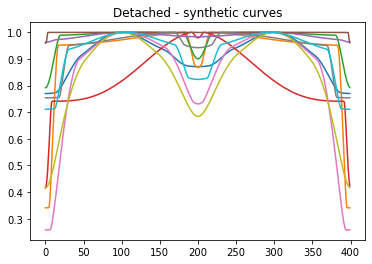

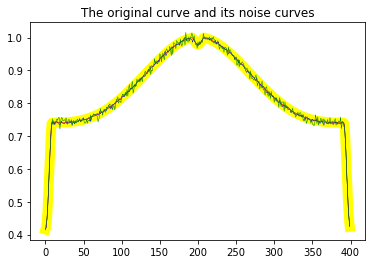

In [9]:
# Blok 9 - Vykreslenie syntetickych svetelnych kriviek a vykreslenie nahodnej syntetickej svetelnej krivky spolu s jej 3 verziami s pridanym umelym sumom.

for i in range(len(X_det)):
    plt.plot(X_det[i])
plt.title("Detached - synthetic curves")
plt.show()

synthetic_curves_plot(randint(0, len(X_det)), X_det, X_det_n)

## Analyza syntetickych dotykovych kriviek

In [10]:
# Blok 10 - nacitanie dat
data_over = pd.read_pickle("overcontact_all_parameters.pkl").reset_index()

In [11]:
# Blok 11 - vypis rozmerov dat a atributov
print("Number of records: ", data_over.shape[0])
print("Number of attributes: ", data_over.shape[1])
print("Attributes: ", list(data_over.columns))

Number of records:  1212796
Number of attributes:  16
Attributes:  ['index', 'id', 'curve', 'primary__t_eff', 'secondary__t_eff', 'inclination', 'mass_ratio', 'primary__surface_potential', 'secondary__surface_potential', 't1/t2', 'filter', 'critical_surface_potential', 'primary__equivalent_radius', 'secondary__equivalent_radius', 'primary__filling_factor', 'secondary__filling_factor']


In [12]:
# Blok 12 - vypis unikatnych filtrov a distribucie dat
print("Unique filters:", data_over["filter"].unique())
print("Distribution of records in each type of filter: \n", data_over["filter"].value_counts())

Unique filters: ['Bessell_U' 'Bessell_B' 'Bessell_V' 'Bessell_R' 'Bessell_I' 'SLOAN_u'
 'SLOAN_g' 'SLOAN_r' 'SLOAN_i' 'SLOAN_z' 'Kepler' 'GaiaDR2' 'TESS']
Distribution of records in each type of filter: 
 Bessell_R    93292
SLOAN_i      93292
Bessell_U    93292
TESS         93292
Bessell_B    93292
Kepler       93292
Bessell_V    93292
GaiaDR2      93292
SLOAN_z      93292
SLOAN_r      93292
Bessell_I    93292
SLOAN_u      93292
SLOAN_g      93292
Name: filter, dtype: int64


In [13]:
# Blok 13 - vypis zakladnych charakteristik
data_over_copy = data_over.copy()
data_over_copy = data_over_copy.drop(columns=['index', 'id', 'curve', 'filter'])
print("Description of numeric attributes: \n ", data_over_copy.describe())

Description of numeric attributes: 
         primary__t_eff  secondary__t_eff   inclination    mass_ratio  \
count    1.212796e+06      1.212796e+06  1.212796e+06  1.212796e+06   
mean     6.537040e+03      6.246543e+03  1.222625e+00  1.420822e+00   
std      9.691032e+02      9.725411e+02  2.181624e-01  1.389326e+00   
min      4.250000e+03      4.250000e+03  4.949341e-01  1.000000e-01   
25%      5.750000e+03      5.500000e+03  1.048325e+00  9.000000e-01   
50%      6.500000e+03      6.250000e+03  1.230496e+00  1.000000e+00   
75%      7.250000e+03      7.000000e+03  1.409921e+00  1.428571e+00   
max      8.000000e+03      8.000000e+03  1.570796e+00  1.000000e+01   

       primary__surface_potential  secondary__surface_potential         t1/t2  \
count                1.212796e+06                  1.212796e+06  1.212796e+06   
mean                 3.985917e+00                  3.985917e+00  1.048225e+00   
std                  1.840244e+00                  1.840244e+00  3.288309e-02  

In [14]:
# Blok 14 - korelacna matica
corr_df = data_over_copy[["inclination", "mass_ratio", "primary__surface_potential", "secondary__surface_potential", "t1/t2", 'primary__equivalent_radius', 'secondary__equivalent_radius']].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,inclination,mass_ratio,primary__surface_potential,secondary__surface_potential,t1/t2,primary__equivalent_radius,secondary__equivalent_radius
inclination,1.000000,-0.033122,-0.017862,-0.017862,0.008147,-0.068383,-0.081698
mass_ratio,-0.033122,1.000000,0.994906,0.994906,-0.139198,-0.786212,0.628690
primary__surface_potential,-0.017862,0.994906,1.000000,1.000000,-0.147475,-0.842158,0.619082
secondary__surface_potential,-0.017862,0.994906,1.000000,1.000000,-0.147475,-0.842158,0.619082
t1/t2,0.008147,-0.139198,-0.147475,-0.147475,1.000000,0.174635,-0.197944
primary__equivalent_radius,-0.068383,-0.786212,-0.842158,-0.842158,0.174635,1.000000,-0.528705
secondary__equivalent_radius,-0.081698,0.628690,0.619082,0.619082,-0.197944,-0.528705,1.000000


In [15]:
# Blok 15 - vyselektovanie nahodnej vzorky a pridanie sumu
data_over_sample = data_over.sample(n=10)

X_over=[]
for row in data_over_sample["curve"]:
    X_over.append(row)
X_over=np.array(X_over)

X_over_n=[]
for i in range(len(data_over_sample)):
    for j in range(3):
        curve=stochastic_noise_generator(X_over[i])
        X_over_n.append(curve[0])

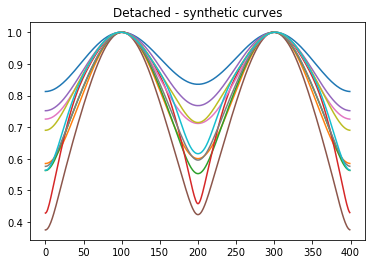

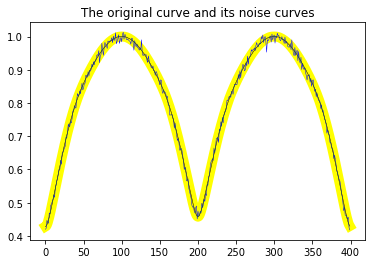

In [16]:
# Blok 16 - Vykreslenie syntetickych svetelnych kriviek a vykreslenie nahodnej syntetickej svetelnej krivky spolu s jej 3 verziami s pridanym umelym sumom.

for i in range(len(X_over)):
    plt.plot(X_over[i])
plt.title("Detached - synthetic curves")
plt.show()

synthetic_curves_plot(randint(0, len(X_over)), X_over, X_over_n)

## Analyza observacnych oddelenych kriviek

In [17]:
# Blok 17 - nacitanie dat
obs_det = pd.read_csv("observed/observed_det.csv")

In [18]:
# Blok 18 - vypis rozmerov dat a atributov
print("Number of records: ", obs_det.shape[0])
print("Number of attributes: ", obs_det.shape[1])
print("Attributes: ", list(obs_det.columns))

Number of records:  25
Number of attributes:  17
Attributes:  ['Unnamed: 0', 'q', 'inc', 'omega1', 'omega2', 'T1', 'T2', 'P', 'Type', 'Spot', 'Ref', 'name', 'filter', 'curve', 't1_t2', 'primary__equivalent_radius', 'secondary__equivalent_radius']


In [19]:
# Blok 19 - vypis unikatnych filtrov a distribucie dat
print("Unique filters:", obs_det["filter"].unique())
print("Distribution of records in each type of filter: \n", obs_det["filter"].value_counts())

Unique filters: ['V' 'I' 'R' 'B']
Distribution of records in each type of filter: 
 V    9
B    7
R    7
I    2
Name: filter, dtype: int64


In [20]:
# Blok 20 - vypis zakladnych charakteristik
obs_det_copy = obs_det.copy()
obs_det_copy = obs_det_copy.drop(columns=['Unnamed: 0', 'Type', 'Spot', 'Ref', 'name', 'filter', 'curve',])
print("Description of numeric attributes: \n ", obs_det_copy.describe())

Description of numeric attributes: 
                 q        inc     omega1     omega2           T1           T2  \
count  25.000000  25.000000  25.000000  25.000000    25.000000    25.000000   
mean    0.485440  83.460000   4.397080   3.445040  7442.400000  5143.160000   
std     0.303068   4.421884   1.873939   2.017025  1108.257942  1325.770709   
min     0.135000  76.300000   2.540000   2.062000  5900.000000  3450.000000   
25%     0.279000  78.300000   2.859000   2.420000  5940.000000  4260.000000   
50%     0.366000  84.700000   4.200000   2.608000  7800.000000  5057.000000   
75%     0.484000  87.700000   4.329000   2.850000  8000.000000  5707.000000   
max     1.000000  88.700000   8.550000   8.550000  9400.000000  7994.000000   

               P      t1_t2  primary__equivalent_radius  \
count  25.000000  25.000000                   25.000000   
mean    1.729364   1.516795                    0.303513   
std     1.637097   0.346533                    0.108062   
min     0.4069

In [21]:
# Blok 21 - korelacna matica
corr_df = obs_det_copy[['q', 'inc', 'omega1', 'omega2', 't1_t2', 'primary__equivalent_radius', 'secondary__equivalent_radius']].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,q,inc,omega1,omega2,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
q,1.000000,0.294429,0.519024,0.840565,-0.815947,-0.350560,-0.314474
inc,0.294429,1.000000,-0.235869,0.198903,-0.379248,0.474847,-0.021933
omega1,0.519024,-0.235869,1.000000,0.792635,-0.369699,-0.923840,-0.865623
omega2,0.840565,0.198903,0.792635,1.000000,-0.711391,-0.556842,-0.747510
t1_t2,-0.815947,-0.379248,-0.369699,-0.711391,1.000000,0.103855,0.354392
primary__equivalent_radius,-0.350560,0.474847,-0.923840,-0.556842,0.103855,1.000000,0.671091
secondary__equivalent_radius,-0.314474,-0.021933,-0.865623,-0.747510,0.354392,0.671091,1.000000


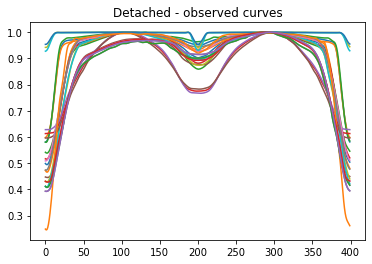

In [22]:
# Blok 22 - vykreslenie kriviek
for i in range(len(obs_det)):
    plt.plot(literal_eval(obs_det.curve[i]))
plt.title("Detached - observed curves")
plt.show()

Unique names: ['ATPeg' 'BUVul' 'FROri' 'IOUMA' 'LLCom' 'V548Cyg' 'v773cas' 'Y Cam'
 'WYHya']


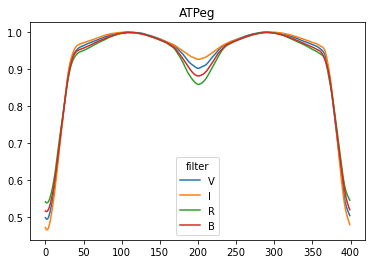

In [24]:
# Blok 23- Vykreslenie svetelnych kriviek konkretneho systemu podla nazvu
print("Unique names:", obs_det["name"].unique())
observed_curves_plot("ATPeg", obs_det)

## Analyza observacnych dotykovych kriviek

In [25]:
# Blok 24 - nacitanie dat
obs_over = pd.read_csv("observed/observed_over.csv")

In [26]:
# Blok 25 - vypis rozmerov dat a atributov
print("Number of records: ", obs_over.shape[0])
print("Number of attributes: ", obs_over.shape[1])
print("Attributes: ", list(obs_over.columns))

Number of records:  43
Number of attributes:  17
Attributes:  ['Unnamed: 0', 'q', 'inc', 'omega1', 'omega2', 'T1', 'T2', 'P', 'Type', 'Spot', 'Ref', 'name', 'filter', 'curve', 't1_t2', 'primary__equivalent_radius', 'secondary__equivalent_radius']


In [27]:
# Blok 26 - vypis unikatnych filtrov a distribucie dat
print("Unique filters:", obs_over["filter"].unique())
print("Distribution of records in each type of filter: \n", obs_over["filter"].value_counts())

Unique filters: ['V' 'B' 'I' 'R']
Distribution of records in each type of filter: 
 V    14
B    11
R    11
I     7
Name: filter, dtype: int64


In [28]:
# Blok 27 - vypis zakladnych charakteristik
obs_over_copy = obs_over.copy()
obs_over_copy = obs_over_copy.drop(columns=['Unnamed: 0', 'Type', 'Spot', 'Ref', 'name', 'filter', 'curve',])
print("Description of numeric attributes: \n ", obs_over_copy.describe())

Description of numeric attributes: 
                 q        inc     omega1     omega2           T1           T2  \
count  43.000000  43.000000  43.000000  43.000000    43.000000    43.000000   
mean    0.665186  76.091860   2.976698   2.976698  6068.325581  6009.976744   
std     0.872349   9.351258   1.349328   1.349328   664.729867   585.130286   
min     0.169000  54.740000   2.080000   2.080000  4874.000000  4660.000000   
25%     0.250000  70.900000   2.317000   2.317000  5750.000000  5644.000000   
50%     0.290000  78.400000   2.396000   2.396000  6200.000000  6210.000000   
75%     0.502000  83.220000   2.835000   2.835000  6500.000000  6449.000000   
max     2.932000  86.000000   6.397000   6.397000  7000.000000  6750.000000   

               P      t1_t2  primary__equivalent_radius  \
count  43.000000  43.000000                   43.000000   
mean    0.404624   1.009270                    0.475483   
std     0.103691   0.039285                    0.077960   
min     0.2347

In [29]:
# Blok 28 - korelacna matica
corr_df = obs_over_copy[['q', 'inc', 'omega1', 'omega2', 't1_t2', 'primary__equivalent_radius', 'secondary__equivalent_radius']].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,q,inc,omega1,omega2,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
q,1.000000,0.385687,0.998260,0.998260,0.295695,-0.939324,0.974352
inc,0.385687,1.000000,0.387483,0.387483,-0.099991,-0.372730,0.445476
omega1,0.998260,0.387483,1.000000,1.000000,0.264691,-0.957682,0.981616
omega2,0.998260,0.387483,1.000000,1.000000,0.264691,-0.957682,0.981616
t1_t2,0.295695,-0.099991,0.264691,0.264691,1.000000,-0.102516,0.193947
primary__equivalent_radius,-0.939324,-0.372730,-0.957682,-0.957682,-0.102516,1.000000,-0.968929
secondary__equivalent_radius,0.974352,0.445476,0.981616,0.981616,0.193947,-0.968929,1.000000


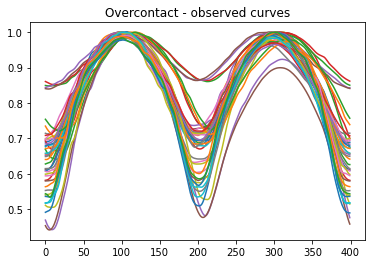

In [30]:
# Blok 29 - vykreslenie kriviek
for i in range(len(obs_over)):
    plt.plot(literal_eval(obs_over.curve[i]))
plt.title("Overcontact - observed curves")
plt.show()

Unique names: ['AH Aur' 'AKHer' 'ASCrB' 'BHCas' 'BQAri' 'BXDra' 'GSC 0763-0572' 'HIDra'
 'UVLyn' 'V1128Tau' 'V2612Oph' 'V2790Ori' 'V369Mon' 'YZPho']


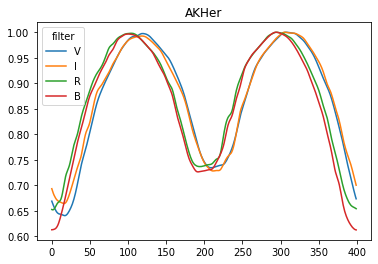

In [32]:
# Blok 30- Vykreslenie svetelnych kriviek konkretneho systemu podla nazvu
print("Unique names:", obs_over["name"].unique())
observed_curves_plot("AKHer", obs_over)